In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

# Binary Alpha Digits

## RBM

In [2]:
from Scripts.lire_alpha_digit import lire_alpha_digit, binary_alpha_digits


size_img = binary_alpha_digits['dat'][0][0].shape
X = lire_alpha_digit(binary_alpha_digits, [10, 11])
X.shape

FileNotFoundError: [Errno 2] No such file or directory: './Data/binaryalphadigs.mat'

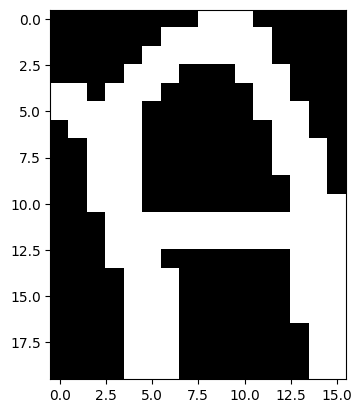

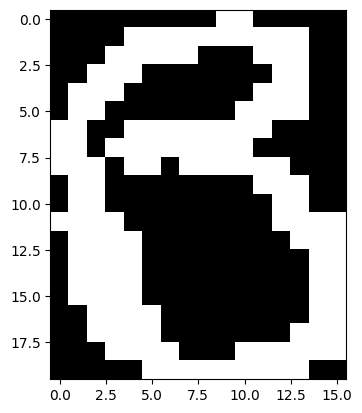

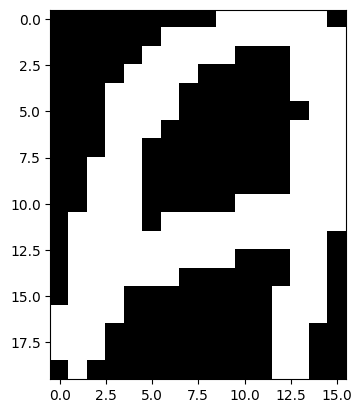

In [ ]:
from Scripts.lire_alpha_digit import display_images

for _ in range(3):
    i = np.random.choice(X.shape[0])
    display_images([X[i]], size_img)

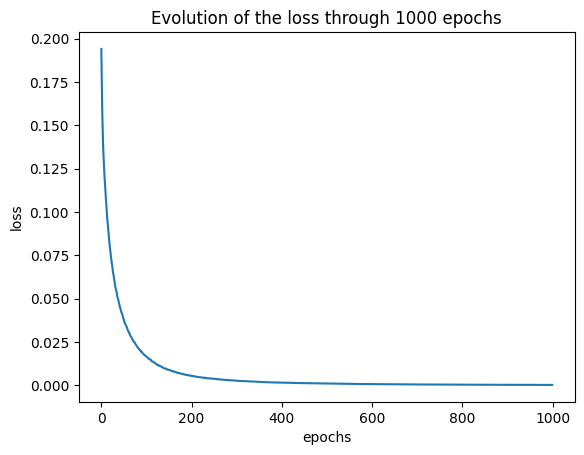

Final loss: 0.00026142652349850576


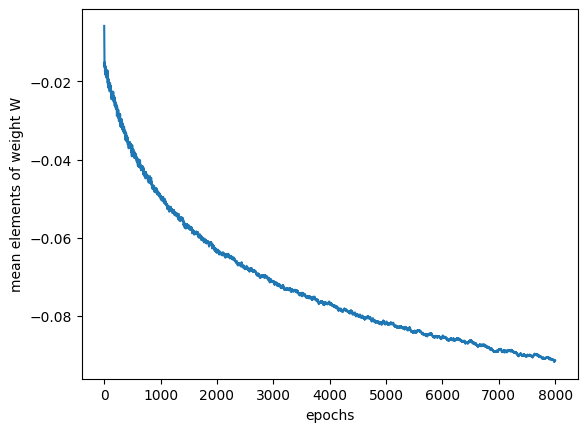

In [ ]:
from Scripts.principal_RBM_alpha import RBM
p = size_img[0]*size_img[1]
q = 100
rbm = RBM(p,q)

rbm.train_RBM(X, learning_rate=10**(-2), len_batch=10, n_epochs=1000, verbose=False)


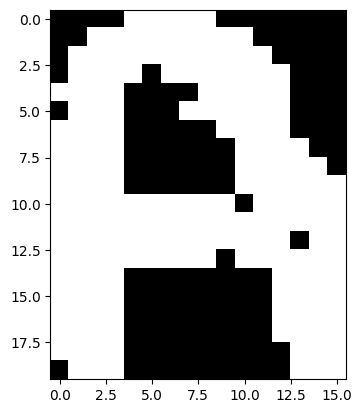

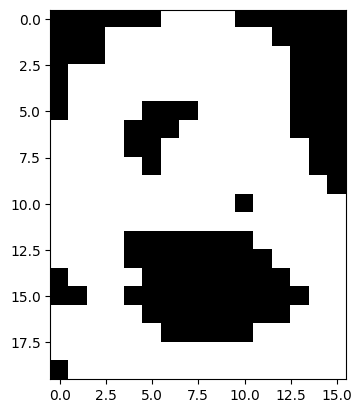

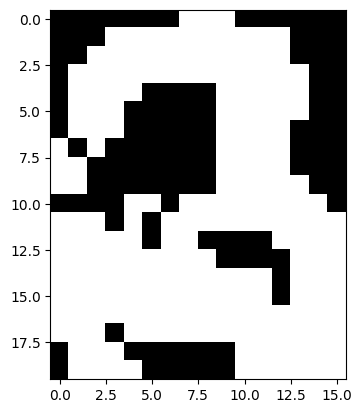

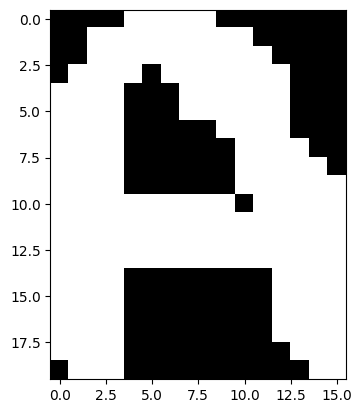

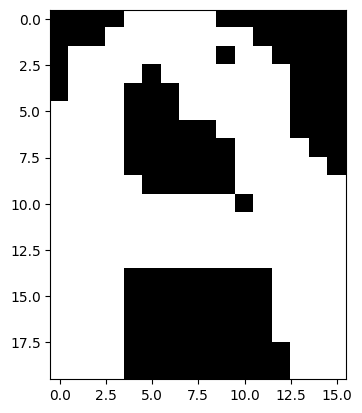

In [ ]:
images = rbm.generer_image_RBM(nb_images=5, nb_iter=200, size_img=size_img)
display_images(images, size_img)

## DBN

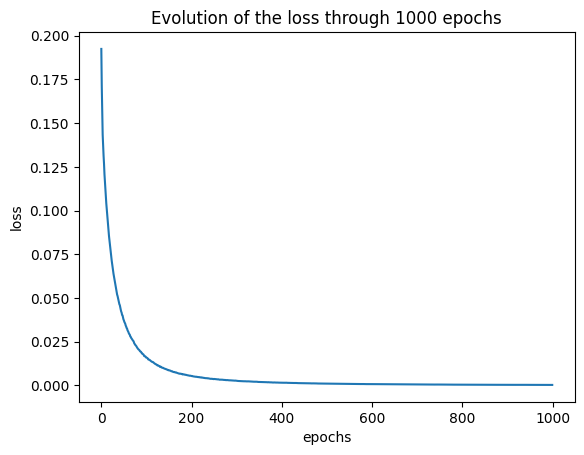

Final loss: 0.00026004796017664843


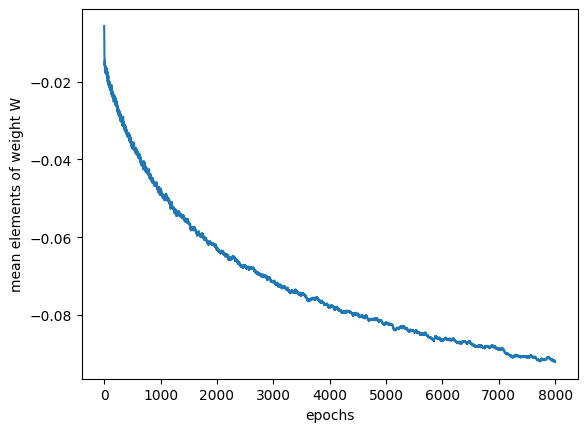

In [ ]:
from Scripts.lire_alpha_digit import lire_alpha_digit, binary_alpha_digits
from Scripts.lire_alpha_digit import display_images
from Scripts.principal_DBN_alpha import DBN

# Load data
size_img = binary_alpha_digits['dat'][0][0].shape
X = lire_alpha_digit(binary_alpha_digits, [10, 11])

# Define DBN architecture
layer_sizes = [size_img[0] * size_img[1], 100]  # Adjust the layer sizes as needed

# Initialize and train DBN
dbn = DBN(layer_sizes)
dbn.train_DBN(X, learning_rate=10**(-2), len_batch=10, n_epochs=1000)

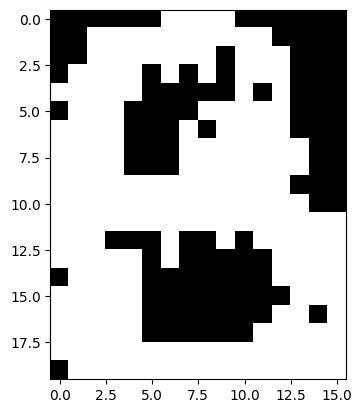

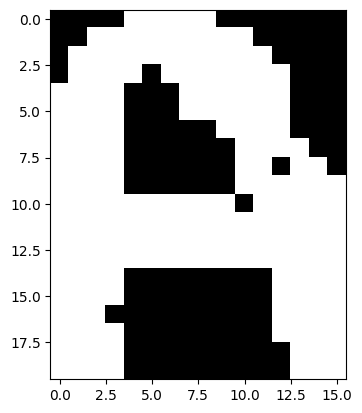

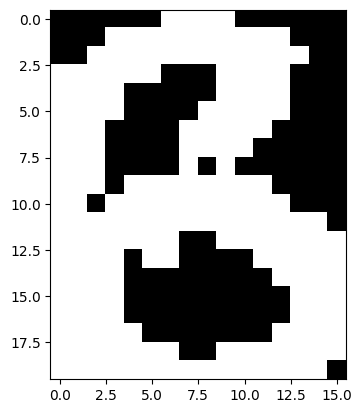

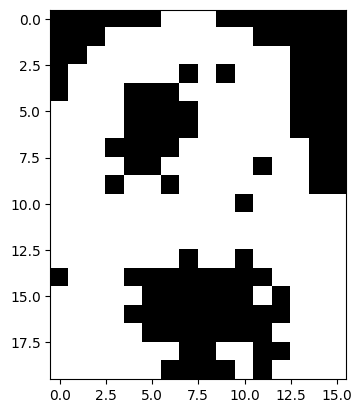

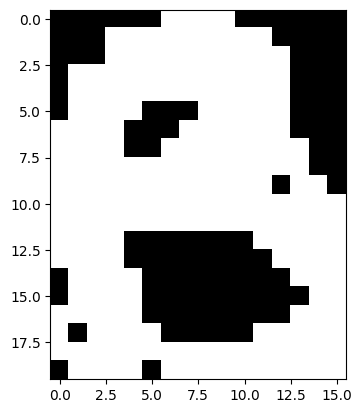

In [ ]:
# Generate and display images using DBN
images = dbn.generer_image_DBN(nb_images=5, nb_iter=200, size_img=size_img)
display_images(images, size_img)

# MNIST

## DNN

In [ ]:
from Scripts.lire_mnist import load_mnist
from Scripts.principal_DNN_mnist import DNN


# Load the MNIST dataset and binarize it
X_train, X_test, y_train, y_test = load_mnist()
X_train = (X_train > 127).astype(np.float32)
X_test = (X_test > 127).astype(np.float32)
#X_train = X_train.reshape(-1, 784)
#X_test = X_test.reshape(-1, 784)

# Specify network and training parameters
sizes = [784, 500, 500, 10]  # number of neurons in each layer
n_iter_rbm = 100  # number of iterations for RBM training
n_iter_bp = 200  # number of iterations for backpropagation
learning_rate = 0.1  # learning rate
len_batch = 5  # reduced batch size
n_train = 600  # number of training examples

# Initialize DNN with random weights
dnn = DNN(sizes)
dnn.init_DNN()

# Pretrain DNN using greedy layer-wise training
dnn.pretrain_DNN(X_train, learning_rate, len_batch, n_iter_rbm)

# Train DNN using backpropagation
dnn.retropropagation(X_train, y_train, learning_rate, len_batch, n_iter_bp)

# Test DNN on test set
error_rate = dnn.test_DNN(X_test, y_test)
print("Error rate on test set:", error_rate)

# Observe output probabilities for some training examples
X_examples = X_train[:10]
y_examples = y_train[:10]
outputs = dnn.entree_sortie_reseau(X_examples)
y_pred = np.argmax(outputs[-1], axis=1)
print("True labels:", y_examples)
print("Predicted labels:", y_pred)
print("Output probabilities:", outputs[-1])

KeyboardInterrupt: 

# Analyse